<a href="https://colab.research.google.com/github/hemachandrank/DeepLearning/blob/main/DL_CarBrand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Transfer Learning using ResNet50**


In [ ]:
#this file is available in GoogleDrive
!unzip /content/drive/MyDrive/Datasets.zip 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

In [4]:
#import TF and keras libraries
from tensorflow.keras.layers import Dense, Lambda, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img


In [5]:
# re-size all the images to this
IMAGE_SIZE = [224,224]

train_path = 'content/Datasets/Train'
valid_path = 'content/Datasets/Test'

In [7]:
#import the resnet library as shown below and add preprocessing layer
#here we need to remove the first and last layer so that we can pass inputs and 
#set the output as necessary
# Input shape should include the RGB values by denoting 3 as shown below
resnet = ResNet50(include_top=False, weights='imagenet', input_shape=IMAGE_SIZE + [3]) 

94773248/94765736 [==============================] - 1s 0us/step


In [8]:
#dont train existing weights
#idea is to use the same weights 

for layer in resnet.layers:
  layer.trainable = False

In [15]:
#get the number of output classes
folders = glob('/content/Datasets/Train/*')
print(len(folders))

3


In [16]:
x = Flatten()(resnet.output)

In [17]:
prediction = Dense(len(folders),activation='softmax')(x)

#create a model object
model = Model(inputs = resnet.input, outputs = prediction)

In [18]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
              )

In [21]:
#Use the image Data generator to import the images from the dataset

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
training_set = train_datagen.flow_from_directory('/content/Datasets/Train',
                                                 target_size= (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')



Found 64 images belonging to 3 classes.


In [23]:
test_set = test_datagen.flow_from_directory('/content/Datasets/Test',
                                                 target_size= (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [24]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
2/2 [==============================] - 23s 15s/step - loss: 5.0198 - accuracy: 0.3438 - val_loss: 10.9827 - val_accuracy: 0.5172
Epoch 2/20
2/2 [==============================] - 17s 12s/step - loss: 10.5451 - accuracy: 0.2969 - val_loss: 4.0031 - val_accuracy: 0.1552
Epoch 3/20
2/2 [==============================] - 17s 12s/step - loss: 3.7522 - accuracy: 0.4062 - val_loss: 9.3249 - val_accuracy: 0.3276
Epoch 4/20
2/2 [==============================] - 17s 12s/step - loss: 5.8048 - accuracy: 0.3906 - val_loss: 8.2823 - val_accuracy: 0.1379
Epoch 5/20
2/2 [==============================] - 17s 12s/step - loss: 4.7851 - accuracy: 0.4219 - val_loss: 3.3007 - val_accuracy: 0.1897
Epoch 6/20
2/2 [==============================] - 20s 15s/step - loss: 1.7761 - accuracy: 0.4062 - val_loss: 2.3555 - val_accuracy: 0.5690
Epoch 7/20
2/2 [==============================] - 19s 15s/step - loss: 3.3353 - accuracy: 0.4375 - val_loss: 2.1830 - val_accuracy: 0.5862
Epoch 8/20
2/2 [=========

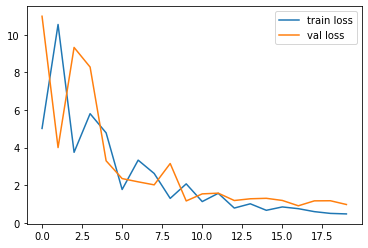

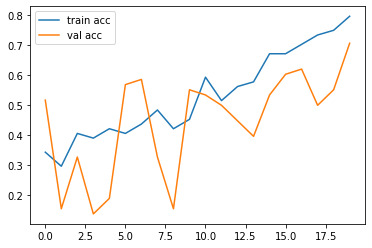

<Figure size 432x288 with 0 Axes>

In [25]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


#from tensorflow.keras.models import load_model

#model.save('model_resnet50.h5')

In [26]:
y_pred = model.predict(test_set)
y_pred

array([[1.46050723e-02, 7.60655522e-01, 2.24739373e-01],
       [2.05329616e-05, 1.82747724e-04, 9.99796689e-01],
       [7.10895984e-03, 9.20945227e-01, 7.19458982e-02],
       [1.58321206e-02, 6.21618807e-01, 3.62549007e-01],
       [8.48144758e-03, 1.53582264e-02, 9.76160288e-01],
       [6.46536231e-01, 2.67004132e-01, 8.64596516e-02],
       [3.29754665e-03, 9.27232146e-01, 6.94702566e-02],
       [9.72904563e-02, 8.05470109e-01, 9.72394422e-02],
       [1.90219551e-03, 6.96949124e-01, 3.01148653e-01],
       [1.37317134e-02, 7.53005780e-03, 9.78738248e-01],
       [2.24993184e-01, 2.82065570e-01, 4.92941260e-01],
       [6.27676584e-03, 6.76595449e-01, 3.17127824e-01],
       [1.93236277e-01, 1.33535802e-01, 6.73227966e-01],
       [3.55048105e-04, 8.85344088e-01, 1.14300884e-01],
       [1.12009429e-05, 9.60465230e-04, 9.99028325e-01],
       [2.51509808e-03, 1.44528657e-01, 8.52956235e-01],
       [1.83663145e-01, 4.71658081e-01, 3.44678730e-01],
       [5.86975319e-03, 3.60208

In [27]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [28]:
y_pred

array([1, 2, 1, 1, 2, 0, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [83]:
img  = image.load_img('/content/Datasets/Train/audi/11.jpg',target_size=(224,224))
x = image.img_to_array(img)
x.shape

(224, 224, 3)

Converting Array to Image using Preprocessing.Image

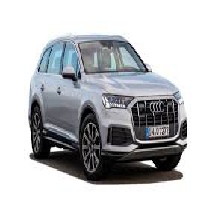

In [84]:
#from tensorflow.keras.preprocessing.image import array_to_img
imgplot = array_to_img(x)
imgplot

In [72]:
x = x/255
x = np.expand_dims(x, axis=0)
img_data = x
img_data.shape

(1, 224, 224, 3)

In [73]:
model.predict(img_data)

array([[0.00178154, 0.74080986, 0.2574086 ]], dtype=float32)

In [76]:
a = np.argmax(model.predict(img_data),axis=1)
a==1

array([ True])